# NAME - DHANYA SRIVASTAVA
 # BATCH - DS2304

# PROJECT DESCRIPTION
# This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.


# To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics
# For downloading the dataset, use the link given below. 

# Dataset Link-
"https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv"


In [6]:
#Let's start with importing necessary Libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [9]:
#importing  data 
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [10]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [11]:
# checking  data type of each column 
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

NO NEED TO CHANGE THE DATATYPE, WE WILL NOW PERFORM EDA

In [12]:
df.shape

(30, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [14]:
# Checking Null Values 
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

NO NULL VALUE

In [15]:
#  checking  the duplicate value
duplicate = df[df.duplicated()]
print("Duplicate Rows :")


Duplicate Rows :


In [16]:
#  Print the resultant Dataframe
duplicate

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


NO DUPLICATE VALUE

In [17]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [21]:
# Describing the values
# R= RUNS
# *AB= AT BATS
# *H= HITS
# *2B= DOUBLES
# *3B= TRIPLES
# *HR= HOMERUNS
# *BB= WALKS
# *SO= STRIKE OUTS
# *SB= STOLEN BASE
# *RA= RUNS ALLOWED
# *ER= EARNED RUNS
# *ERA= EARNED RUN AVERAGE
# *CG= COMPLETE GAME
# *SHO= SHUTOUT
# *SV= SAVE
# *W=WIN 

PERFORMING EDA

In [22]:
def EDA(df,i): # create a function for Continuous variables
    plt.figure(figsize=(20,5),facecolor='#FFCBA4')
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()

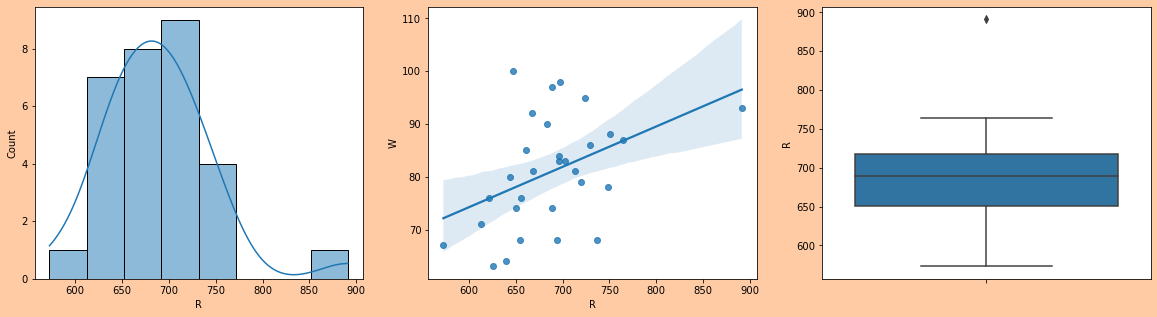

In [23]:
EDA(df,'R')

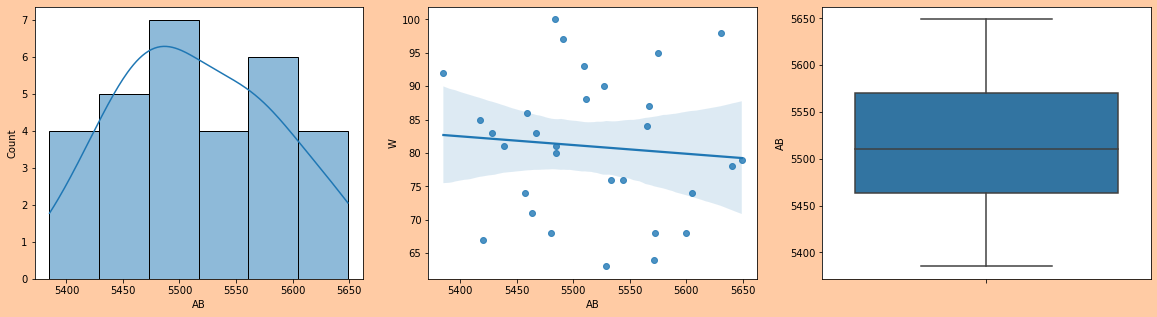

In [24]:
EDA(df,'AB')

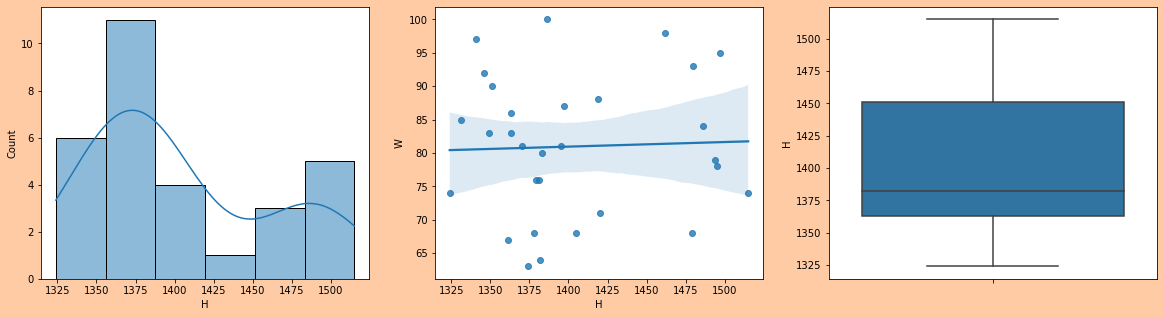

In [25]:
EDA(df,'H')

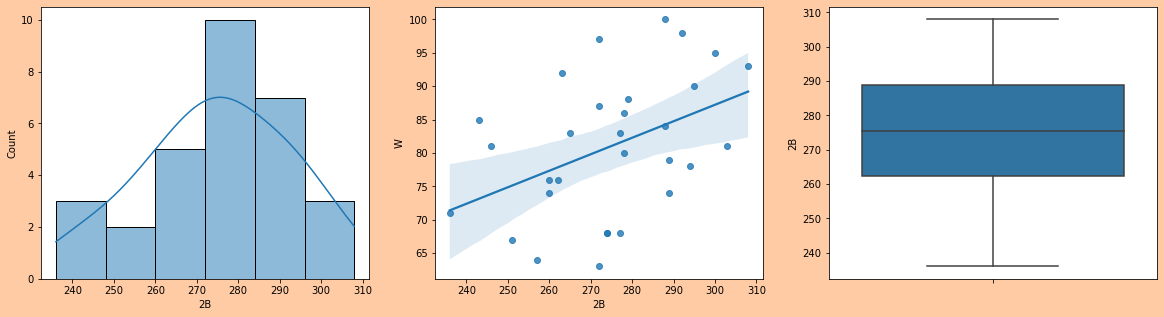

In [26]:
EDA(df,'2B')

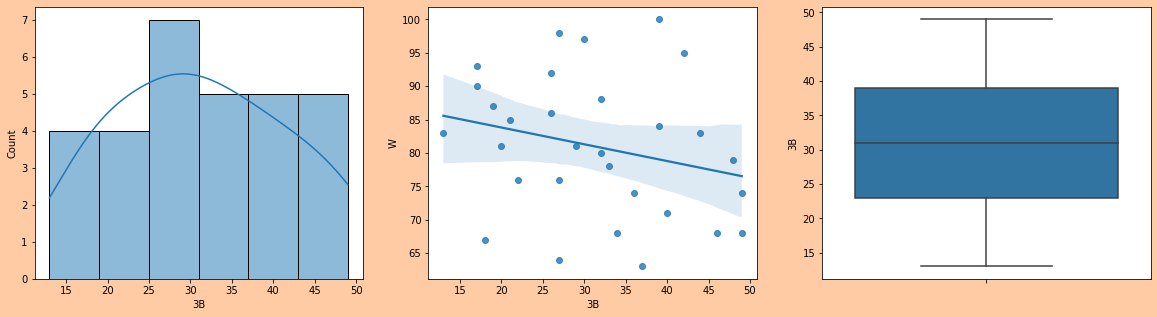

In [27]:
EDA(df,'3B')

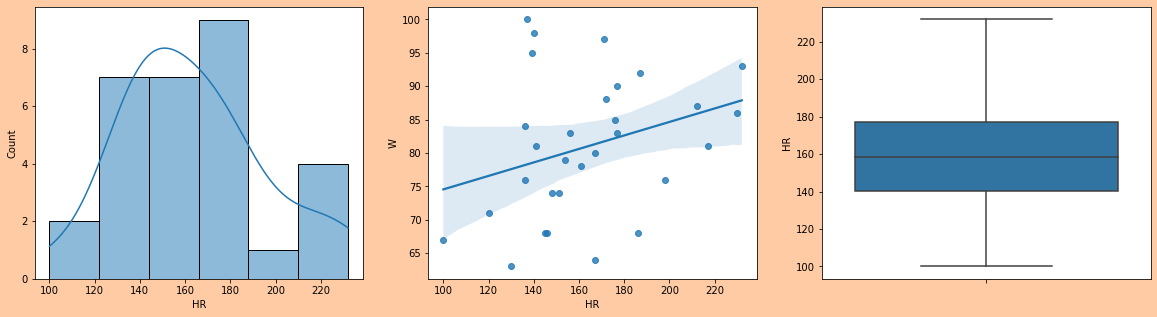

In [28]:
EDA(df,'HR')

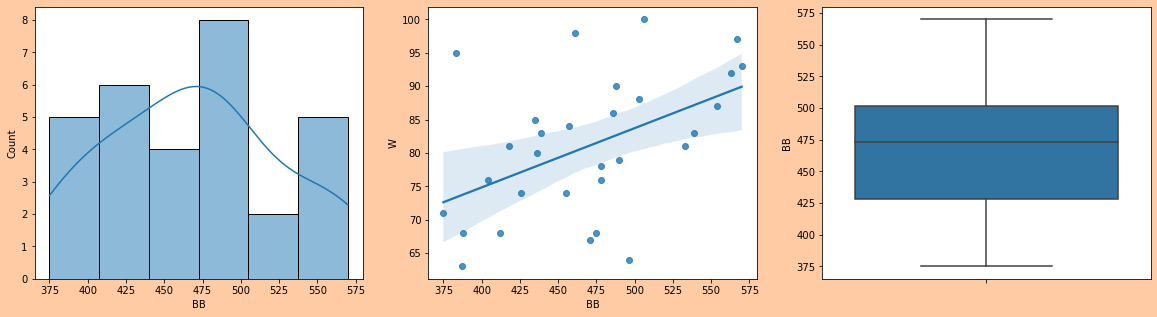

In [29]:
EDA(df,'BB')

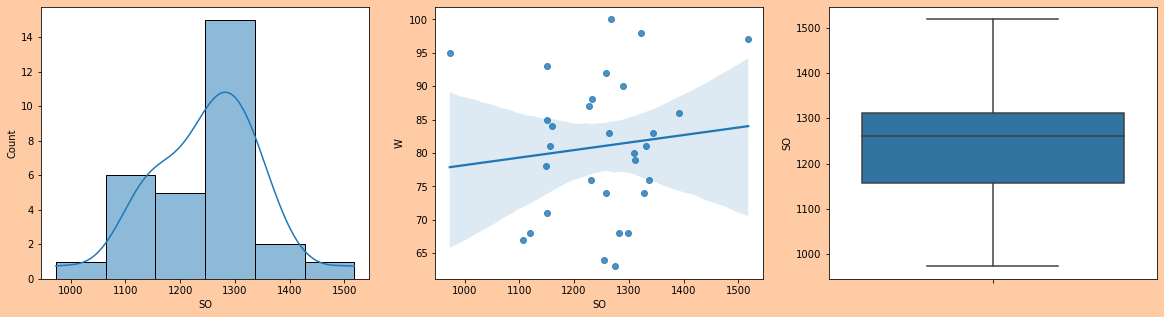

In [30]:
EDA(df,'SO')

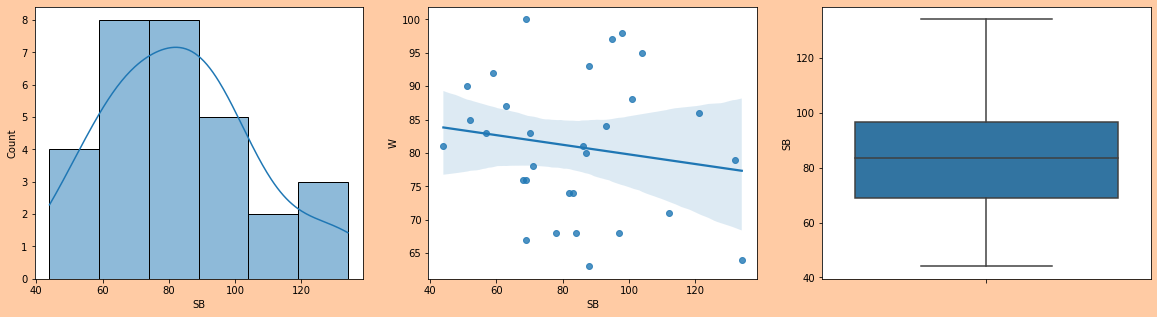

In [31]:
EDA(df,'SB')

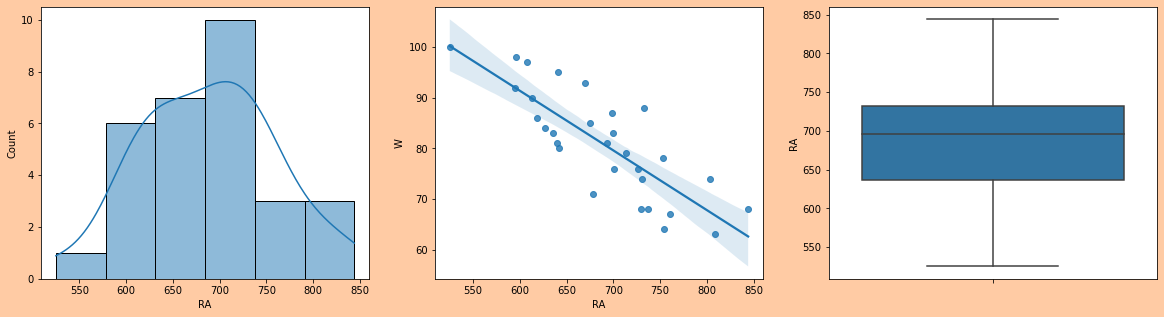

In [32]:
EDA(df,'RA')

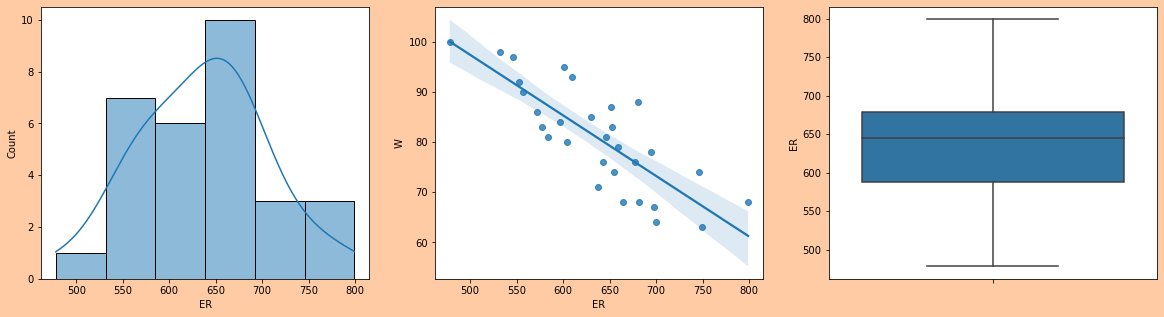

In [33]:
EDA(df,'ER')

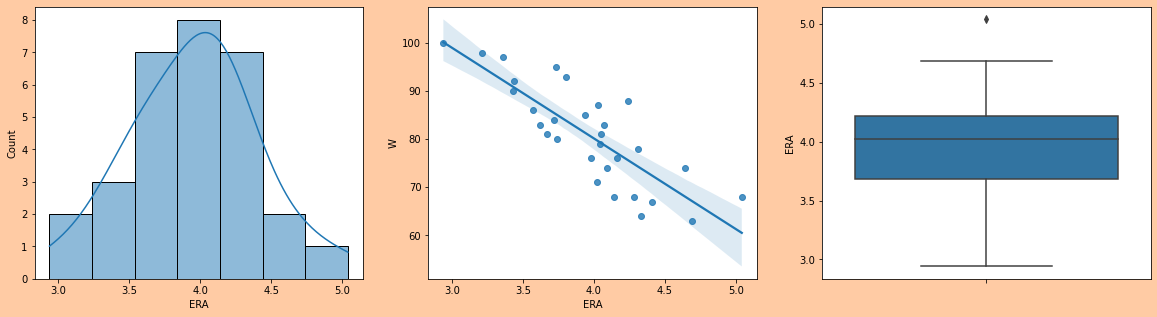

In [34]:
EDA(df,'ERA')

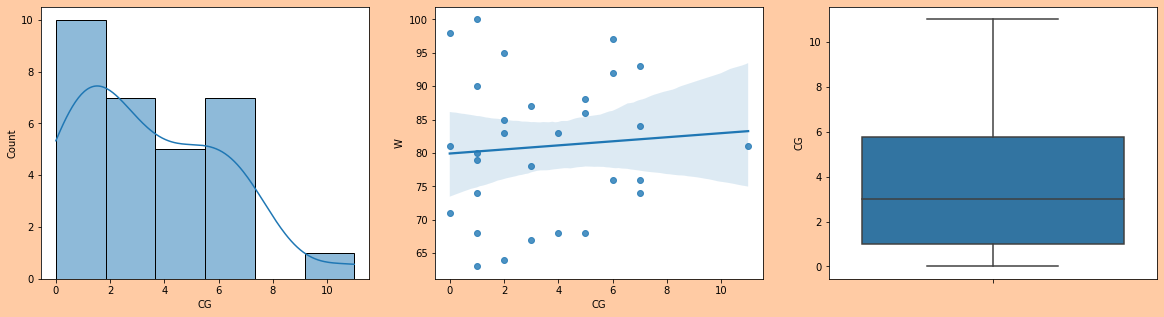

In [35]:
EDA(df,'CG')

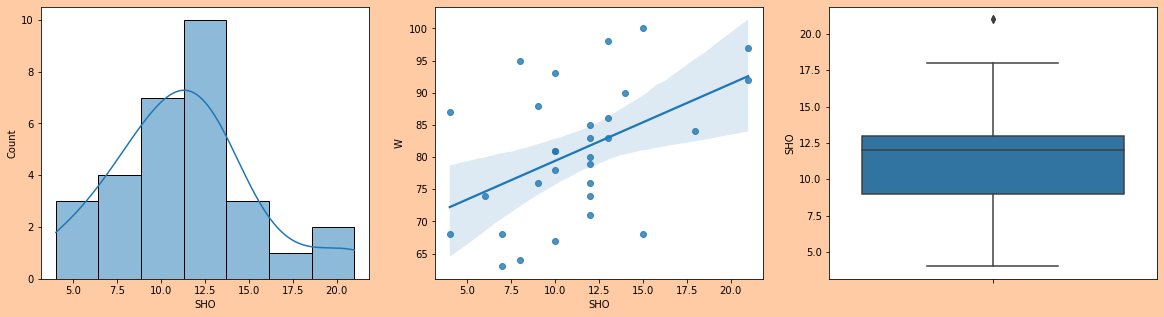

In [36]:
EDA(df,'SHO') 

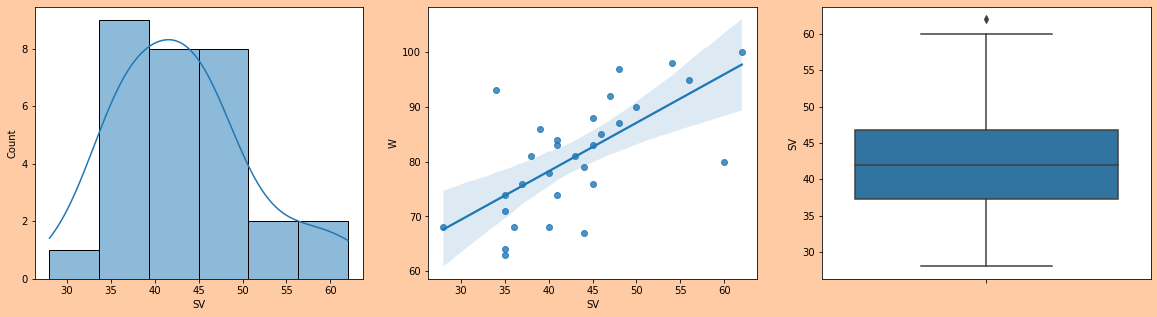

In [37]:
EDA(df,'SV') 

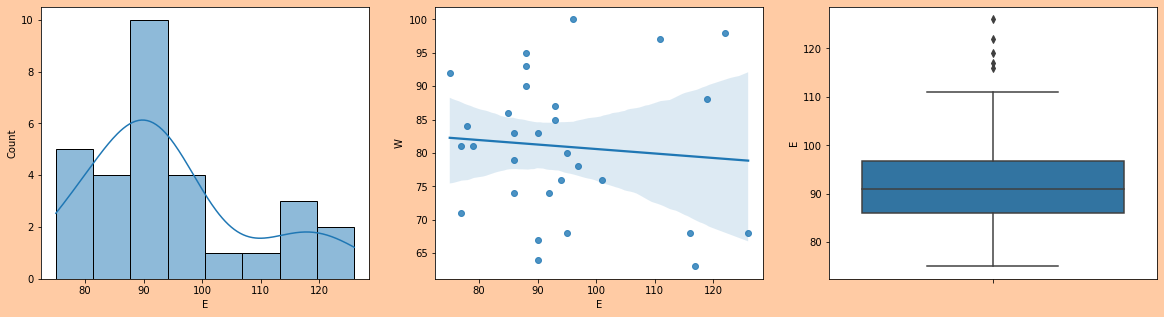

In [38]:
EDA(df,'E') 

# Outlier treatment


Outliers are extreme values in data that are far from the majority of the values. They can be seen as tails in the histogram.

How to remove Outliers..?

The outlires can be removed using the methods listed below.
1)Z-score method
2)IQR method

# Removing the Outliers by using Zscore method

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.03333333333333333


In [41]:
 #fea for features
    
fea = df1.drop('W', axis=1)

#lab for label
lab = df1.W 

In [43]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_feature = scalar.fit_transform (fea)

In [45]:
fea.shape

(29, 16)

# Checking the multicollinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vi = pd.DataFrame()
vi["vi"]= [variance_inflation_factor (scaled_feature, i) for i in range (scaled_feature.shape[1])]
vi["Features"] = fea.columns
#vi must be done after scaling the data 


In [50]:
#Let's check the values
vi

,vi,Features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


<AxesSubplot:>

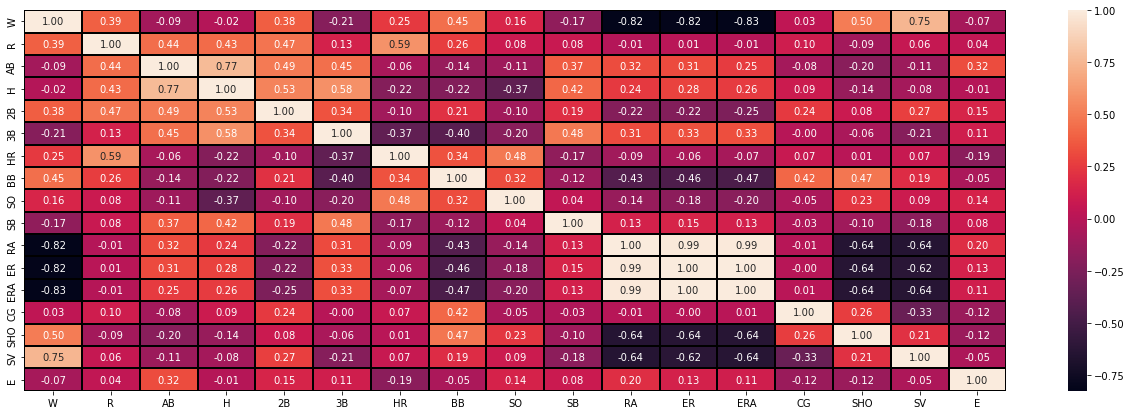

In [51]:
plt.figure(figsize=(22,7)) 

# ploting the heat map
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [52]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [53]:
corr_features = correlation(df1, 0.5)
len(set(corr_features))

9

In [54]:
 #highly correlated features name
    
corr_features

{'2B', '3B', 'ER', 'ERA', 'H', 'HR', 'RA', 'SHO', 'SV'}

# Correlation of column with the target column



In [55]:
df1.corr()['W'].sort_values() 

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.072858
H     -0.018360
CG     0.029594
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

<AxesSubplot:title={'center':'Correlation with target'}>

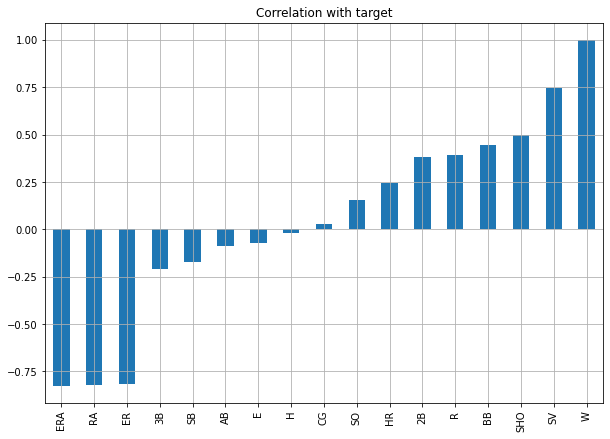

In [56]:
df1.corr()['W'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with target')

Removing multi correlated features & Selecting only final features



In [57]:
fea = df1.drop(columns=['W',  'AB', 'H',  '3B',   'SO', 'SB', 'RA', 'ER',
        'CG',  'E'], axis=1) 
lab = df1.W

In [59]:
#scaling to the final feature

scalar = StandardScaler()
scaled_feature = scalar.fit_transform (fea)  

In [60]:
# checking VIF again



vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled_feature, i) for i in range (scaled_feature.shape[1])]
vif["Features"] = fea.columns


In [61]:
#vif must be done after scaling the data 

#Let's check the values

vif

,vif,Features
0,2.925754,R
1,2.155338,2B
2,2.475624,HR
3,1.684869,BB
4,3.257540,ERA
5,2.052548,SHO
6,1.954878,SV


# Split data into train and test

In [63]:
maxAccu=0
lrm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(scaled_feature,lab,test_size=0.3,random_state=i)
    lrm = LinearRegression()
    lrm.fit(x_train, y_train)
    pred=lrm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.9648474191608399 on random state 30


In [65]:
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,lab,test_size=0.3,random_state=30)

In [66]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [67]:
df.tail (2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# Predict the chance of winning 

In [68]:
print ('Chance of Winning is',lrm.predict (scalar.transform ([[650,260,148,426,4.09,6,41 ]])))


Chance of Winning is [73.44857898]


In [69]:
# Adjusted R2 score 
# when we have multiple feature that time we check Adjusted R2 score
print('Model accuracy score on training data=',  lrm.score (x_train,y_train))
print('Model accuracy score on testing data=',lrm.score(x_test,y_test))

Model accuracy score on training data= 0.8820353239373457
Model accuracy score on testing data= 0.9648474191608399


➤ Now our model performance is 94 % for training data set and 91 % for the test data set.

In [70]:
y_pred = lrm.predict(x_test)
y_pred

array([96.31928334, 73.44857898, 86.32076715, 85.44611395, 61.15502141,
       92.04634087, 80.91297443, 81.6268045 , 89.9487725 ])

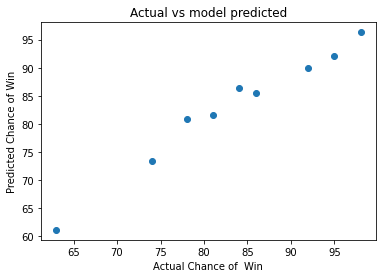

In [71]:
plt.scatter (y_test,y_pred)
plt.xlabel('Actual Chance of  Win')
plt.ylabel('Predicted Chance of Win')
plt.title('Actual vs model predicted')
plt.show()

# Model evalution for LinearRegression

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [73]:
y_pred = lrm.predict(x_test)


In [74]:
print ('mean_absolute_error is ',mean_absolute_error(y_test,y_pred))
print ('mean_squared_error is ',mean_squared_error(y_test,y_pred))
print ('mean_squared_error is ',np.sqrt(mean_squared_error(y_test,y_pred)))

mean_absolute_error is  1.7218261132018553
mean_squared_error is  3.7817233263264303
mean_squared_error is  1.944665350729125


# Let's see if our model is overfitting our training data.
# Regularization

# Types of Regularization
# 1) Lasso( Least Absolute Shrinkage and Selection Operator) / L1 form
# 2) Ridge(L2form)
 

In [78]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV


# Lasso( Least Absolute Shrinkage and Selection Operator) / L1 form

In [79]:
lasscv = LassoCV (alphas = None, max_iter = 100, normalize = True) 
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [80]:
#best alpha parameter
alpha= lasscv.alpha_
alpha

0.10539793245946863

In [81]:
# Now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso (alpha)
lasso_reg. fit (x_train, y_train)

Lasso(alpha=0.10539793245946863)

In [83]:
# Let's Check Lasso regression score

lasso_reg.score(x_test,y_test)


0.9629282888396353

# Using Ridge regression model

In [84]:
ridgecv=RidgeCV (alphas = np.arange (0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [85]:
ridgecv.alpha_



0.071

In [86]:
ridge_model= Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.071)

In [87]:
ridge_model.score(x_test, y_test)

0.9645058001749305

# Conclusion: So, we can see by using different type of regularization, we still are getting the same r2 score. That means our model has been well trained over the training data and there is no overfitting.